In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from loader_util.preprocessing import AspectAwarePreprocessor, ImageToArrayPreprocessor
from loader_util.datasets import SimpleDatasetLoader
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from loader_util.nn.conv import LeNet
from imutils import paths
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
import cv2
import os
sns.set()

In [10]:
dataFolder = r"C:\Users\mhasa\Google Drive\Tutorial " \
             r"Corner\PYTH\DeepLearning\DeepLearning-DL4CV\ImageDatasets\cellImages2"

args = {
    'dataset': dataFolder
}

imagePaths = list(paths.list_images(args['dataset']))

In [11]:
# initialise the preprocessors
sp = AspectAwarePreprocessor(224, 224)
iap = ImageToArrayPreprocessor()

# load the dataset
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
data, labels = sdl.load(imagePaths, verbose=100)
data = data.astype('float') / 255.0

[INFO] processed 100/1337
[INFO] processed 200/1337
[INFO] processed 300/1337
[INFO] processed 400/1337
[INFO] processed 500/1337
[INFO] processed 600/1337
[INFO] processed 700/1337
[INFO] processed 800/1337
[INFO] processed 900/1337
[INFO] processed 1000/1337
[INFO] processed 1100/1337
[INFO] processed 1200/1337
[INFO] processed 1300/1337


In [12]:
# data_gray = []
# 
# for ind, processed_image in enumerate(data):
#     gray = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)
#     gray = img_to_array(gray)
#     #print(processed_image.shape)
#     #print(gray.shape)
#     data_gray.append(gray)
# data_gray = np.array(data_gray)
# data = data_gray.astype('float') / 255.0 # scale image to 0-1

In [13]:
le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 3)
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.2,
                                                random_state=42, stratify=labels)

# imbalance
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [14]:
epoch_no = 20
opt = SGD(learning_rate=0.005)
model = LeNet.build(width=224, height=224, depth=3, classes=3)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])
H = model.fit(trainx,
              trainy, validation_data=[testx, testy],
              batch_size=10,
              epochs=epoch_no,
              verbose=1,
              class_weight=classWeight)

Train on 1069 samples, validate on 268 samples
Epoch 1/20
1069/1069 [==============================] - 13s 12ms/sample - loss: 1.0984 - accuracy: 0.3770 - val_loss: 1.0854 - val_accuracy: 0.3619

In [15]:
# evaluate the network
preds = model.predict(testx, batch_size=10)
rep = classification_report(testy.argmax(axis=1), preds.argmax(axis=1), 
                            target_names=le.classes_)
print(rep)

              precision    recall  f1-score   support

         3T3       0.62      0.49      0.55        97
        MG63       0.41      0.60      0.48        92
        hASC       0.86      0.61      0.71        79

    accuracy                           0.56       268
   macro avg       0.63      0.57      0.58       268
weighted avg       0.62      0.56      0.58       268



In [16]:
epochs = range(1,epoch_no+1)
loss = H.history['loss']
accuracy = H.history['accuracy']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_accuracy']
plot_df = pd.DataFrame(data=np.c_[epochs,loss,accuracy,val_loss,val_accuracy], 
                       columns=['epochs','loss', 'accuracy', 'val_loss', 'val_accuracy'])

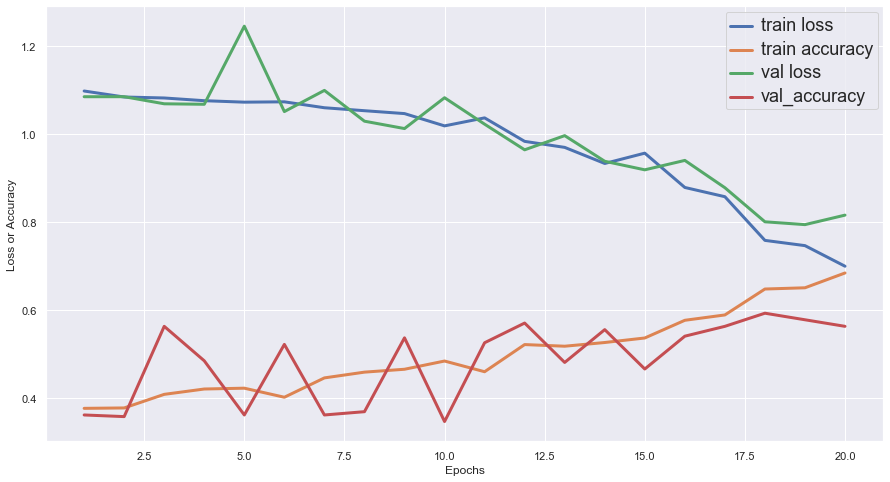

In [17]:
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

In [23]:
model.save('./checkpoint')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./checkpoint\assets
